# Investigate TMDB movie dataset

In [57]:
# import all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import a 'magic word' so that vizualizations are plotted inline with the notebook
%matplotlib inline

In [58]:
# load the dataset
tmdb = pd.read_csv('./tmdb-movies.csv')

## Data Wrangling
In this section of the report, I will check the data, and then identify areas to improve and clean the dataset for analysis.

In [59]:
tmdb.shape

(10866, 21)

The dataset contains 21 variables and 10866 records.

In [60]:
# print out the first few lines
tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [61]:
# Check for data types
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Based on the questions, I will drop the variables id, imdb_id, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, production_companies which are not relevant to the analysis. The budget and revenue should be dropped since the budget_adj and revenue_adj, adjusted for 2010 dollar, are more relevant for comparison overtime. Once I dropped the variables, I will inspect the datatypes again to see if I have to make any changes.

The variable 'genres' has type string, and each genre in a movie is separated by pipe (|) characters. I plan to separate the genres for each row and assign binary value for each genre.

To begin, I will check for duplicates, missing values, look at the statistical summary to notice any anomaly in the dataset.

In [62]:
# Check for duplicates
sum(tmdb.duplicated())

1

In [63]:
# Check for null values
tmdb.isnull().values.sum()

13434

There are quite a lot of missing values in the dataset.

In [64]:
# Get a statistical summary of the dataset
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the sattsis  it seems that budget and reveeamsf,sd,mf

In [65]:
# Count the rows with zero budget
zero_budget = tmdb.query('budget_adj == "0.0"')
len(zero_budget)

5696

In [66]:
# Count the rows with zero revenue
zero_revenue = tmdb.query('revenue_adj == "0.0"')
len(zero_revenue)

6016

In [67]:
# Count the rows with zero runtime
zero_runtime = tmdb.query('runtime == 0.0')
len(zero_runtime)

31

From the count of rows with zero revenue and budget, it seems that I have to remove more than half of the observations of the dataset (6,016 movies without revenue). This is unfortunate because I initially expect that I could have kept more observations to have a robust analysis. However, I choose not to replace the zero values with a mean or a mode revenue values based on the release year because movies' successes are very different, and I would rather exclude the movies without sufficient data.

### Data Cleaning
I perform the cleaning steps in this section.

First, I drop extraneous columns that are not relevant to my questions.

In [68]:
# Drop the columns that are not needed for analysis
mod_tmdb = tmdb.drop(['homepage', 'tagline', 'keywords', 'cast', 
                      'imdb_id', 'id', 'overview','revenue', 'budget', 
                      'production_companies'], axis=1)
mod_tmdb.head(2)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [69]:
# Drop duplicates
mod_tmdb = mod_tmdb.drop_duplicates()

In [70]:
# Drop nulls
mod_tmdb = mod_tmdb.dropna()

In [71]:
# Drop the rows with zero runtime, budget, and revenue
clean_tmdb = mod_tmdb[(mod_tmdb['runtime'] != 0.0) & (mod_tmdb['budget_adj'] != 0.0) & (mod_tmdb['revenue_adj'] != 0.0)]

In [72]:
clean_tmdb.head(3)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Since one movie has multiple genres, I want to convert the categorical variable into dummy variables, and assign 1 for each genre contained in the 'genres' column.

In [73]:
# Convert genres into dummy variables
dummy_tmdb = clean_tmdb['genres'].str.get_dummies()

In [74]:
# Join the clean dataframe with the dummy dataframe
main_tmdb = pd.concat([clean_tmdb, dummy_tmdb], axis = 1)

# Statistical summary of the clean dataframe
main_tmdb.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3.853000e+03,3.853000e+03,3853.000000,3853.000000,3853.000000,...,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.00000,3853.000000,3853.000000,3853.000000
mean,1.191825,109.208928,527.854399,6.168258,2001.259278,4.425038e+07,1.370974e+08,0.281599,0.194394,0.052167,...,0.033480,0.120166,0.035297,0.089281,0.172852,0.134700,0.00026,0.312484,0.030885,0.013496
std,1.475258,19.912913,880.031643,0.795001,11.283517,4.481043e+07,2.161299e+08,0.449837,0.395785,0.222393,...,0.179911,0.325198,0.184554,0.285186,0.378169,0.341447,0.01611,0.463566,0.173029,0.115401
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.462609,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.840420e+07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.797723,106.000000,204.000000,6.200000,2004.000000,3.001664e+07,6.174274e+07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.368403,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632752e+08,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


After cleaning, my new dataset has 3,853 observations and 27 variables. I do a sanity check with the maximum and minimum values of all the numerical variables and they look reasonable.

In [75]:
# Inspect datatypes
main_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 31 columns):
popularity         3853 non-null float64
original_title     3853 non-null object
director           3853 non-null object
runtime            3853 non-null int64
genres             3853 non-null object
release_date       3853 non-null object
vote_count         3853 non-null int64
vote_average       3853 non-null float64
release_year       3853 non-null int64
budget_adj         3853 non-null float64
revenue_adj        3853 non-null float64
Action             3853 non-null int64
Adventure          3853 non-null int64
Animation          3853 non-null int64
Comedy             3853 non-null int64
Crime              3853 non-null int64
Documentary        3853 non-null int64
Drama              3853 non-null int64
Family             3853 non-null int64
Fantasy            3853 non-null int64
Foreign            3853 non-null int64
History            3853 non-null int64
Horror             385

The data types of the clean dataframe look appropriate. Type int variables are runtime, vote_count, and all the genres. Type float variables are popularity, vote_average, budget_adj and revenue_ajd. Type object variable is genres.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
- How are runtimes, budgets and revenues trending over time?

In order to find the trend of runtimes, budgets and revenues over time, I will group the variables according to year and then find the mean of each variable and plot the mean runtime for each year.

#### Trend of runtimes over years

In [76]:
tmdb_release_years = mod_tmdb.groupby('release_year').mean()

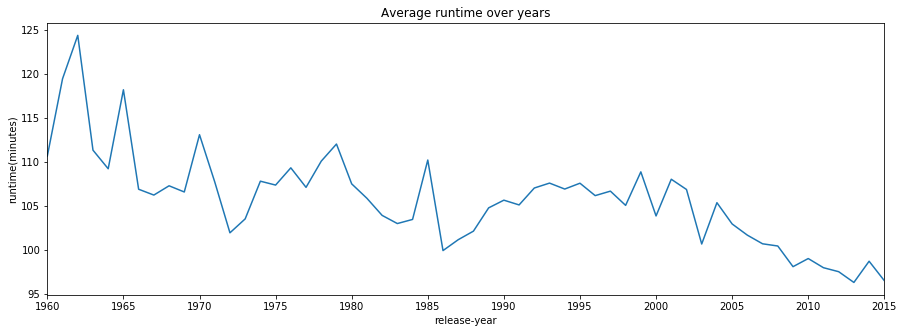

In [77]:
tmdb_release_years['runtime'].plot(kind='line',figsize=(15,5))
plt.title('Average runtime over years')
plt.ylabel('runtime(minutes)')
plt.xlabel('release-year')
plt.xticks(np.arange(1960, 2018, 5))
plt.show()

**Answer**: From the graph we can see that the average runtime of movies has decreased from 1960 to 2015 in general. The movies with longer runtimes are in the period from 1960 to 1965 and the movies with shorter runtime are in the period from 2010 to 2015.

#### Trend of budgets over years

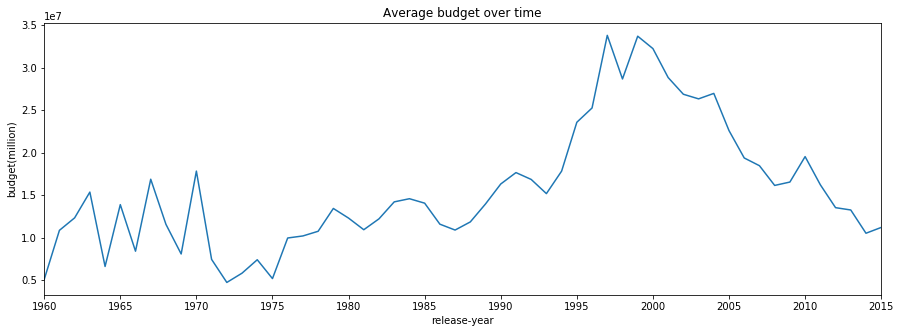

In [78]:
tmdb_release_years['budget_adj'].plot(kind='line',figsize=(15,5))
plt.title('Average budget over time')
plt.ylabel('budget(million)')
plt.xlabel('release-year')
plt.xticks(np.arange(1960, 2018, 5))
plt.show()

**Answer**: From the graph we can see that the average budget of movies was a lot higher in the period 1995 to 2005. Also the budget was very low in the period from 1972 to 1977.

#### Trend of revenues over years

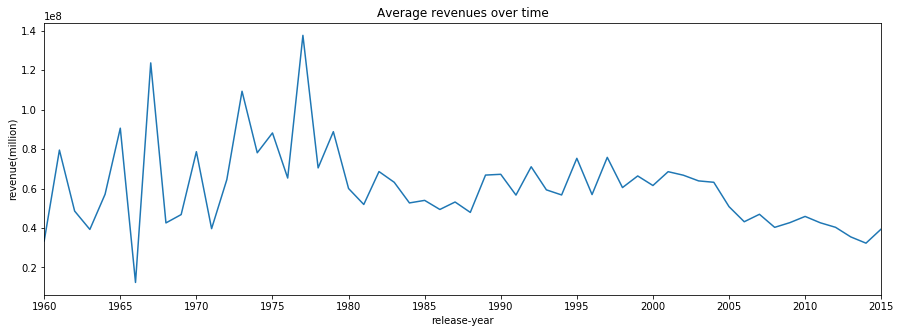

In [79]:
tmdb_release_years['revenue_adj'].plot(kind='line',figsize=(15,5))
plt.title('Average revenues over time')
plt.ylabel('revenue(million)')
plt.xlabel('release-year')
plt.xticks(np.arange(1960, 2018, 5))
plt.show()

**Answer**: From the graph we can see that the average revenue of movies from 1980 to 2015 was between 0.4million dollars to 0.8million dollars. The highest revenues for movies were in the year 1977, 1967, 1973.

### Research Question 2: What features are associated with movies that have highest ratings?

#### Are ratings of movies and budget related?

Text(0.5,1,'Relation between Budget and Rating')

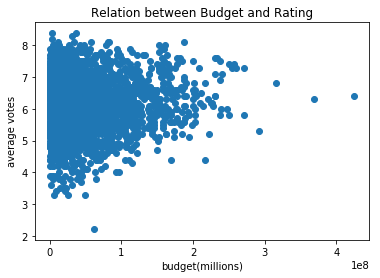

In [80]:
plt.scatter(clean_tmdb['budget_adj'], clean_tmdb['vote_average'])
plt.xlabel('budget(millions)')
plt.ylabel('average votes')
plt.title('Relation between Budget and Rating')

There does not appear to be a trend of movies budget with average vote in Fig 9. In order to confirm this, we will need to calculate the correlation coefficient (Pearson's r) which will give us insight into whether or not there is a correlation of movies budget with average vote rating.

In [81]:
# Calculate the correlation coefficient using NumPy's built in function
# indexing [0][1] gives the correlation of x,y
r = np.corrcoef(clean_tmdb['budget_adj'], clean_tmdb['vote_average'])[0][1]

# print Pearson's r
print(r)

0.0367002856109


**Answer: **The correlation coefficient is an indication of the strength of a linear relationship between two variables. A correlation coefficient equal to 1 indicates a perfect fit, thus the closer the correlation coefficient to 1, the better the fit. The correlation coefficient was calculated to be 0.0367, this indicates a very poor fit of the data, indicating that there is no clear correlation of movie budget with average vote ratings.

#### What movie has highest and lowest ratings?
I want to look at the highest and lowest rated movies from 1960 to 2015.

In [82]:
clean_tmdb.sort_values('vote_average', ascending=False).head(5)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4178,7.192039,The Shawshank Redemption,Frank Darabont,142,Drama|Crime,9/10/94,5754,8.4,1994,3.677779e+07,4.169346e+07
7948,0.283191,Stop Making Sense,Jonathan Demme,88,Documentary|Music,11/16/84,23,8.4,1984,2.518850e+06,1.045097e+07
7269,5.738034,The Godfather,Francis Ford Coppola,175,Drama|Crime,3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09
650,4.780419,Whiplash,Damien Chazelle,105,Drama|Music,10/10/14,2372,8.2,2014,3.039600e+06,1.288891e+07
4179,6.715966,Forrest Gump,Robert Zemeckis,142,Comedy|Drama|Romance,7/6/94,4856,8.1,1994,8.091114e+07,9.973333e+08


In [83]:
main_tmdb.sort_values('vote_average', ascending=True).head(5)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
4859,0.111351,Foodfight!,Lawrence Kasanoff,87,Animation|Action|Comedy|Family,6/15/12,12,2.2,2012,6.173338e+07,...,0,0,0,0,0,0,0,0,0,0
3134,0.812489,Disaster Movie,Jason Friedberg|Aaron Seltzer,87,Action|Comedy,8/29/08,130,3.3,2008,2.531967e+07,...,0,0,0,0,0,0,0,0,0,0
4115,0.231392,FearDotCom,William Malone,101,Horror|Thriller,8/9/02,46,3.3,2002,4.849046e+07,...,0,1,0,0,0,0,0,1,0,0
4540,0.543869,Dracula 3D,Dario Argento,109,Horror|Romance|Thriller,1/29/12,22,3.3,2012,5.318568e+06,...,0,1,0,0,1,0,0,1,0,0
7526,0.571060,Epic Movie,Jason Friedberg|Aaron Seltzer,86,Action|Adventure|Comedy,1/25/07,170,3.4,2007,2.103337e+07,...,0,0,0,0,0,0,0,0,0,0


**Answer**: The movie with the highest voting up to 2015 is The Shawshank Redemption (1994) followed by Stop Making Sense (1984)  and the movie with least rating is FoodFight (2012) followed by Disaster Movie (2008).

### Research Question 3: Which genres are most popular from year to year?

#### Genres popularity by count
In order to get the total number of genres in the dataset, I will get a sum for each variables. Then I will drop all the variables that are not genres to create a new dataframe by year and genres.

In [84]:
# Get a sum of each column by year
tmdb_genres = main_tmdb.groupby('release_year').sum()

# Drop the columns that are not genres
tmdb_genres = tmdb_genres.drop(['popularity','runtime','vote_count','vote_average','budget_adj','revenue_adj'], axis=1)
tmdb_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,2,1,0,2,0,0,3,0,0,0,1,1,0,0,2,0,0,1,0,1
1961,2,2,1,4,1,0,6,2,0,0,1,1,1,0,1,0,0,0,1,1
1962,2,3,0,0,1,0,5,0,0,0,1,0,0,0,0,0,0,1,1,2
1963,2,2,0,1,0,0,3,0,0,0,3,1,0,1,2,0,0,3,1,0
1964,1,1,0,3,1,0,4,2,1,0,0,0,3,1,2,0,0,2,1,0


#### Most popular genre

In [85]:
# Sort the count of the genres by decending order
tmdb_genres_sum = tmdb_genres.sum().sort_values(ascending=False)
tmdb_genres_sum

Drama              1755
Comedy             1357
Thriller           1204
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              12
TV Movie              1
dtype: int64

Text(0,0.5,'Movie Count')

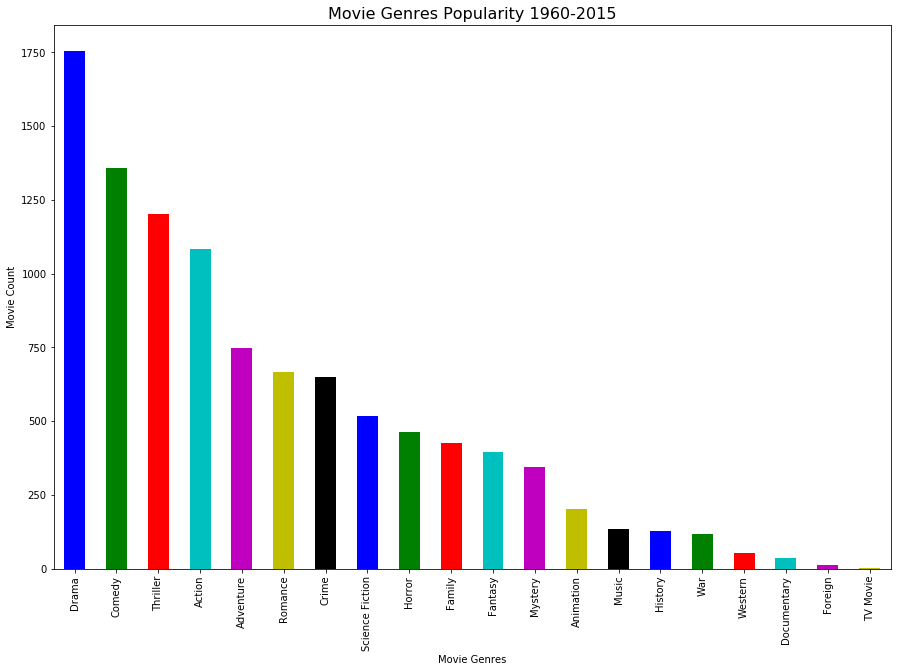

In [86]:
# Plot Move Genres Popularity 1960-2015
tmdb_genres_sum.plot(kind='bar', color = 'bgrcmyk', figsize = (15,10));
plt.title('Movie Genres Popularity 1960-2015', fontsize=16)
plt.xlabel("Movie Genres")
plt.ylabel("Movie Count")

**Answer**: Drama is the most popular movie genre in the period 1960-2015, out of a total of 20 genres.

The top 5 most popular movie genres are Drama, Comedy, Thriller, Action, and Adventure.

#### Genres popularity by percent


I want to create another graph to show the percent of each genre in the dataset. I will create a pie chart to illustrate numerical percentage.

Text(0,0.5,'')

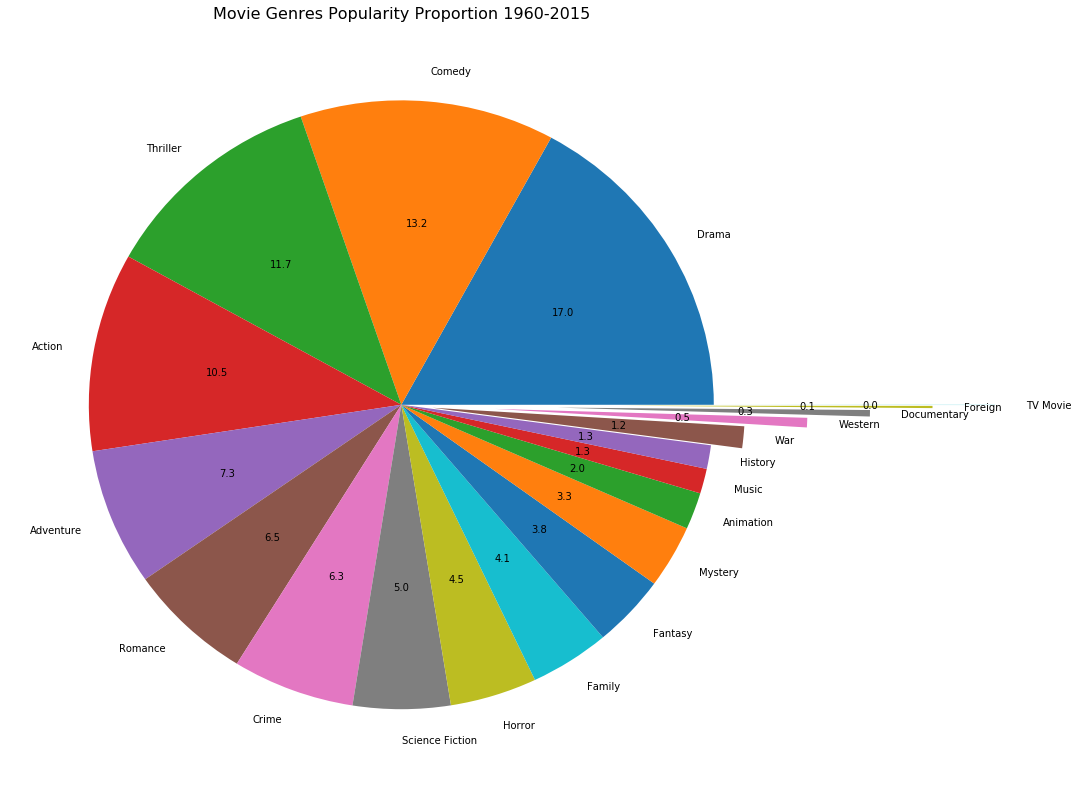

In [87]:
# Plot pie chart, show percentage
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.3, 0.5, 0.7, 0.9)
tmdb_genres_sum.plot(kind='pie', figsize = (14,14), autopct='%.1f', fontsize=10, explode=explode);
plt.title('Movie Genres Popularity Proportion 1960-2015', fontsize=16)
plt.ylabel('')

**Answer:** From this visual, it is easy to notice that the top 4 genres (i.e., Drama, Comedy, Thriller, Action) accounts for more than half of the genres for movies between 1960 and 2015.

From the bottom, Foreign, Documentary, Western each accounts for less than 1% out of the 20 genres. TV Movies represents 0% because there is only 1 count of TV Movies in the clean dataset.

### Research Question 4: What features are associated with movies that have higher revenue?

In [88]:
# Bin edges that put the data into groups
bin_edges = [ 2.370705e+00, 1.835735e+07, 6.173068e+07, 1.632577e+08, 2.827124e+09]

In [89]:
# Labels for the four revenue groups
bin_names = ['low', 'medium', 'moderately high', 'high'] 

According to this dataset, movies with high revenues are defined as movies that made more than 163 million. 

Movies with moderately high revenues are movies that made more than 62 million and less than 163 million.

Movies with medium revenues are movies that made more than 18 million and less than 62 million.

Movies with low revenues are movies that made less than 18 million.

In [90]:
# Creates revenue_levels column
main_tmdb['revenue_levels'] = pd.cut(main_tmdb['revenue_adj'], bin_edges, labels=bin_names)
main_tmdb.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,revenue_levels
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,...,0,0,0,0,1,0,1,0,0,high
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,...,0,0,0,0,1,0,1,0,0,high
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,...,0,0,0,0,1,0,1,0,0,high
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,...,0,0,0,0,1,0,0,0,0,high
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,...,0,0,0,0,0,0,1,0,0,high


In [91]:
tmdb_genre_levels = main_tmdb.groupby(['revenue_levels'], as_index=False)['Drama','Comedy','Thriller','Action',\
                                                                          'Adventure','Romance','Crime',\
                                                                          'Science Fiction','Horror', 'Family',\
                                                                          'Fantasy', 'Mystery', 'Animation', 'Music',\
                                                                          'History', 'War', 'Western', 'Documentary',\
                                                                          'Foreign', 'TV Movie'].sum()

In [92]:
# Explore genres for movies with high revenues
tmdb_genres_high = tmdb_genre_levels[tmdb_genre_levels['revenue_levels'] == 'high'].drop('revenue_levels', axis=1)

Text(0,0.5,'Count')

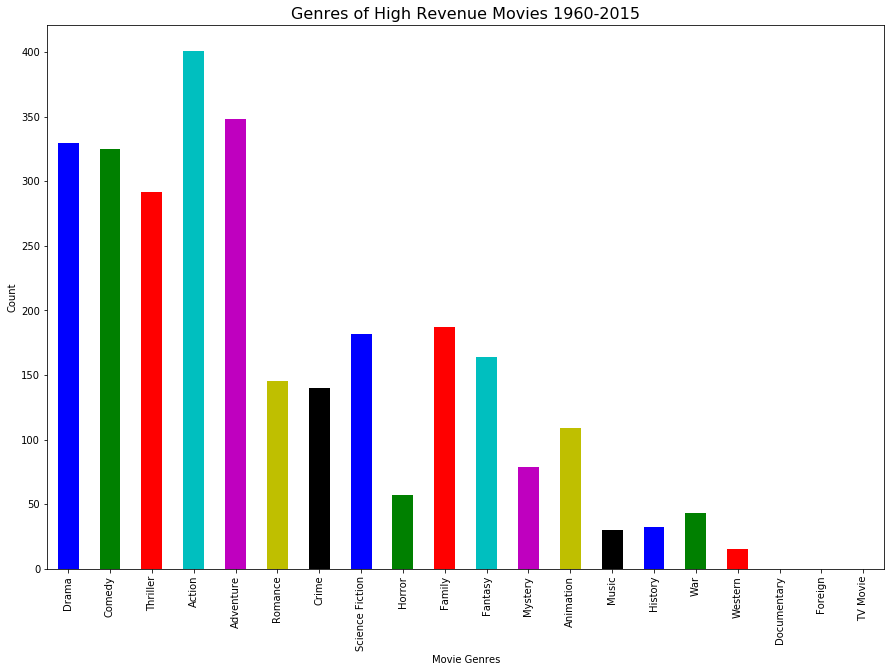

In [93]:
# Plot genres of high revenue movies
tmdb_genres_high.transpose().plot(kind='bar', figsize = (15,10), color = 'bgrcmyk', legend=False);
plt.title('Genres of High Revenue Movies 1960-2015', fontsize=16)
plt.xlabel('Movie Genres')
plt.ylabel('Count')

**Answer**: The top 5 genres of movies that have high revenues are Action, Adventure, Drama, Comedy, and Thriller. These are also the top 5 genres of all the movies in the dataset. However, the orders are different compared to the figure in the research question 1. In question 1, the order is [Drama, Comedy, Thriller, Action, Adventure] for the top 5, and here the order is [Action, Adventure, Drama, Comedy, Thriller].

#### What movies have high revenues?
I want to take a look at top 10 highest earning movies between 1960 and 2015.

In [94]:
# Find movies with the highest revenues
main_tmdb.sort_values('revenue_adj', ascending=False).head(10)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,revenue_levels
1386,9.432768,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,...,0,0,0,0,1,0,0,0,0,high
1329,12.037933,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,...,0,0,0,0,1,0,0,0,0,high
5231,4.355219,Titanic,James Cameron,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,...,0,0,0,1,0,0,1,0,0,high
10594,2.010733,The Exorcist,William Friedkin,122,Drama|Horror|Thriller,12/26/73,1113,7.2,1973,3.928928e+07,...,1,0,0,0,0,0,1,0,0,high
9806,2.563191,Jaws,Steven Spielberg,124,Horror|Thriller|Adventure,6/18/75,1415,7.3,1975,2.836275e+07,...,1,0,0,0,0,0,1,0,0,high
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,...,0,0,0,0,1,0,0,0,0,high
8889,2.900556,E.T. the Extra-Terrestrial,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,4/3/82,1830,7.2,1982,2.372625e+07,...,0,0,0,0,1,0,0,0,0,high
8094,1.136610,The Net,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,7/28/95,201,5.6,1995,3.148127e+07,...,0,0,1,0,0,0,1,0,0,high
10110,2.631987,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,1/25/61,913,6.6,1961,2.917944e+07,...,0,0,0,0,0,0,0,0,0,high
4361,7.637767,The Avengers,Joss Whedon,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,2.089437e+08,...,0,0,0,0,1,0,0,0,0,high


**Answer**: The movie with the highest revenue up to 2015 is Avatar (2009). Star War has 2 movies in this list: Star War (1977) and Star Wars: The Force Awakens (2015). This list shows that every decade (i.e. 60s, 70s, 80s, 90s, 00s, 10s) has at least one movie in the top 10 highest earning movies between 1960 and 2015.

#### What are highest and average revenue over time?

There are two things I'm interested in: the highest revenue, and the average revenue for each year. I want to see if movies nowadays generally earn more than movies in the past.

In [95]:
# Calculate the maximum revenues and average revenues for each year
year_max_rev = main_tmdb.groupby(['release_year'], as_index=False)['revenue_adj'].max()
year_ave_rev = main_tmdb.groupby(['release_year'], as_index=False)['revenue_adj'].mean()

Text(0,0.5,'Billion Dollars')

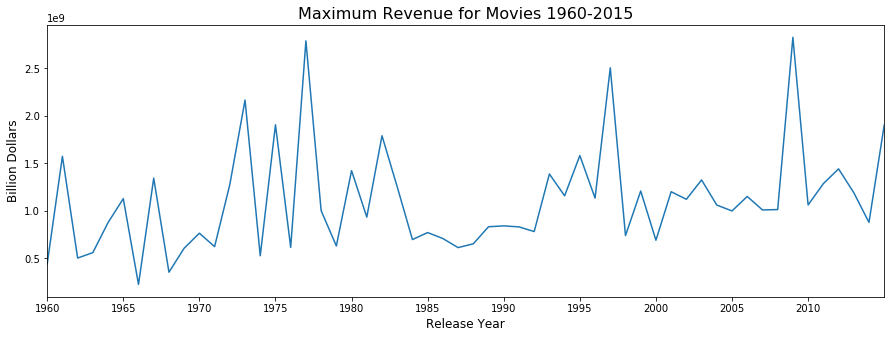

In [96]:
# Plot the maximum revenue for movies over time
year_max_rev.plot(kind='line', x='release_year', figsize=(15,5), fontsize=10, legend=False);
plt.title('Maximum Revenue for Movies 1960-2015', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.xlim([1960, 2015])
plt.xticks(np.arange(1960, 2015, 5))
plt.ylabel('Billion Dollars', fontsize=12)

**Answer**: From this graph, it seems like each time period has its own movie that could produce high earning. There are spikes of movies with high revenues over the period 1960-2015. The highest spikes happened in 1977, 1997, and 2009. They are Star Wars (1977), Titanic (1997), and Avatar (2009). The period 1985-1992 does not observe any movies with very high revenues.

Text(0,0.5,'Hundred Million Dollars')

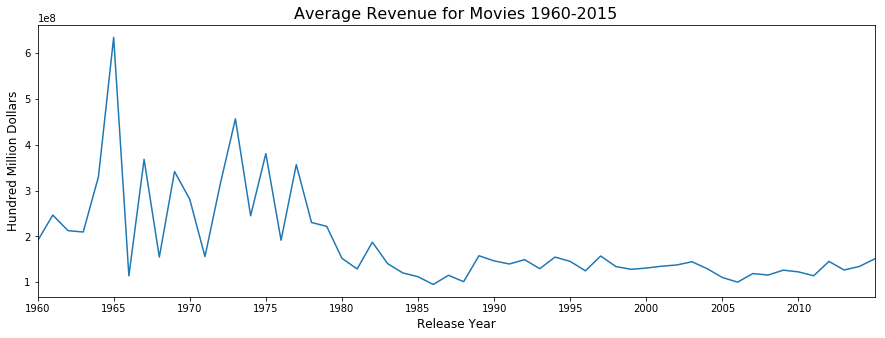

In [97]:
# Plot the average revenue for movies over time
year_ave_rev.plot(kind='line', x='release_year', figsize=(15,5), fontsize=10, legend=False)
plt.title('Average Revenue for Movies 1960-2015', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.xlim([1960, 2015])
plt.xticks(np.arange(1960, 2015, 5))
plt.ylabel('Hundred Million Dollars', fontsize=12)

**Answer**: It is surprising that the average revenue for movies over time is right-skewed. The higher revenue movies are in the period 1965-1977, and generally the average revenues for movies from 1989-2015 are below $200 million. This could be explained that in the past, there were fewer movies, people had few options so the revenues were concentrated in a few titles. However, there are a lot of movies released each year nowadays, hence the revenues are shared among viewers and it brings down the average revenue of all the movies for the whole year.

<a id='conclusions'></a>
## Conclusions

### Limitations

- There are a lot of unreported runtime, budget and revenue for this dataset, resulting in only about 35% of the observations in the dataset being used for the analysis (3,854 out of 10,866). If I had more observations in my analysis, the results could be different.
- 'Genres' column contains multiple values separated by pipe characters. Hence, the assumption for this analysis is that a movie may have more than one genre. If only movie only has one genre, the result could be different.  
- My classification of four movie revenue levels is only based on the descriptive statistic and not based on any official/formal classification. Any change in the definition of the revenue levels could change my results and vizualizations.
- There are fewer movies produced in the 20th century than movies produced in the 21st century. This could make the descritive statistics of movies in the past less robust than movies closer to the present. I have not provided a way to normalize some variables in this dataset for better comparison.

### Results
The runtime, budget and revenue of movies has changed overtime. The runtime of movies in general has decreased from 1960 t0 2015. The movies from 60's, 70's and 80's have longer runtimes and the movies from the period 2010 to 2015 has shorter runtimes. The movies with very high budget are from the period 1995 to 2005. The revenue in general has not changed that much except for the years 1967, 1973, 1977 where the revenue was very high.

There is no relation between the average_vote(rating) of a movie and the budget of movie. Also the movie with the highest voting up to 2015 is The Shawshank Redemption (1994) followed by Stop Making Sense (1984) and the movie with least rating is FoodFight (2012) followed by Disaster Movie (2008).

From the data set, the top 5 most popular movie genres between 1960 and 2015 are Drama, Comedy, Thriller, Action, and Adventure. The top 5 most popular genres account for more than 50 percent of the genres. The limitation of this result is that a movie may contain a few genres, hence the result may change if one movie is allowed to be classified by one genre. For next step, I could cut all the letters in the string after the first pipe (|) character, read only the first genre in the string, create a new binary variable just for that first genre, and then do a similar analysis.

Movies that have high revenues often associate with high average popularity, runtime, ratings, and budget. All of the variables seem to move in the same direction with the level of revenue. However, since I do not perform a linear regression with revenue as the dependent variable, the analysis in this project does not imply causation. In addition, it is surprising that the average revenues for movies back in the 60s and 70s were higher than those for movies in the 2000s in terms of 2010 dollars, accounting for inflation over time. Further exploration for movies in different decade could be a topic of interest.  